In [10]:
 pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr
df = fdr.DataReader('KS11','2019-11-01','2022-10-31')

print(df)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-11-01  2084.790039  2100.419922  2081.530029  2100.199951  2100.199951   
2019-11-04  2111.320068  2130.830078  2111.320068  2130.239990  2130.239990   
2019-11-05  2133.659912  2143.120117  2128.699951  2142.639893  2142.639893   
2019-11-06  2142.689941  2156.229980  2138.830078  2144.149902  2144.149902   
2019-11-07  2141.050049  2147.010010  2135.449951  2144.290039  2144.290039   
...                 ...          ...          ...          ...          ...   
2022-10-25  2237.040039  2253.239990  2230.750000  2235.070068  2235.070068   
2022-10-26  2240.699951  2258.110107  2234.489990  2249.560059  2249.560059   
2022-10-27  2266.070068  2290.560059  2262.020020  2288.780029  2288.780029   
2022-10-28  2276.729980  2292.649902  2266.439941  2268.399902  2268.399902   
2022-10-31  2293.750000  2295.510010  2273.729980  2

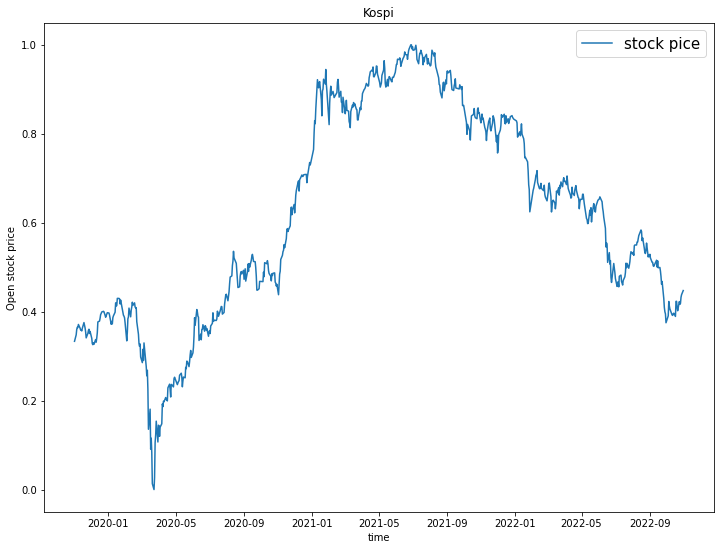

In [ ]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

# 데이터 로드
df = fdr.DataReader('KS11','2019-11-1','2022-10-31')

from sklearn.preprocessing import MinMaxScaler
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = MinMaxScaler(df)
open = dfx[['Open']]

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.title('Kospi')
plt.plot(open, label='stock pice')
plt.xlabel('time')
plt.ylabel('Open stock price')
plt.legend(prop={'size': 15})
plt.show()

In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# 데이터 로드
df = fdr.DataReader('KS11','2019-11-1','2022-10-31')

open = df[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(open)

TEST_SIZE = 150
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data)-window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 7)

model1 = Sequential()
model1.add(SimpleRNN(30,input_shape = (X_train.shape[1], 1), activation='tanh'))
model1.add(Dense(1, activation='tanh'))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
37/37 [==============================] - 2s 7ms/step - loss: 0.0721
Epoch 2/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0066
Epoch 5/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 7/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 8/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 9/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0031
Epoch 10/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 11/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 12/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 13/100
37/37 [===============

5/5 [==============================] - 0s 7ms/step


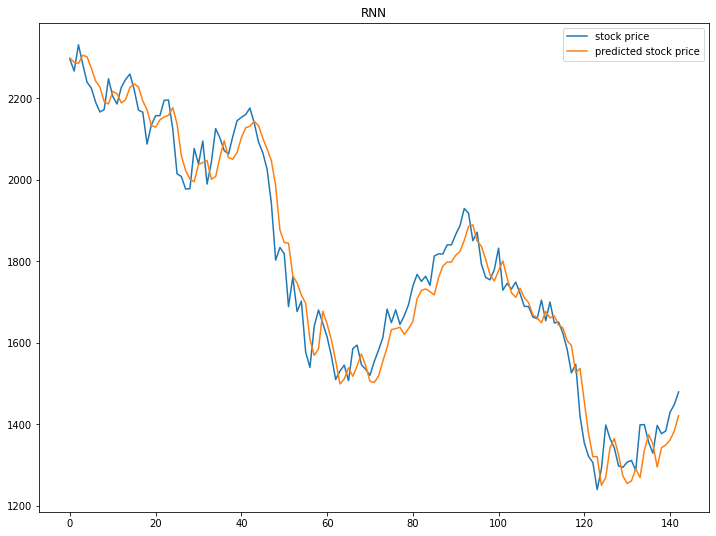

# RMSE  45.59615925759731
kospi 시가 : [2203.84583969]


In [12]:
X_test, y_test = make_sample(test_data, 7)
pred = model1.predict(X_test)

import tensorflow.python.keras.losses as losses
plt.figure(figsize=(12, 9))
plt.title('RNN')
plt.plot(y_test*scaler.data_max_, label='stock price')
plt.plot(pred*scaler.data_max_, label='predicted stock price')
pred_n=pred*scaler.data_max_
y_test_n=y_test*scaler.data_max_
plt.legend()
plt.show()
print('# RMSE ',np.mean(losses.mean_squared_error(pred_n,y_test_n)**0.5))
print("kospi 시가 :", df.Open[-1] * pred[-1] / scaled[-1])


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# 데이터 로드
df = fdr.DataReader('KS11','2019-11-1','2022-10-31')

open = df[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(open)

TEST_SIZE = 150
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data)-window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 7)

model2 = Sequential()
model2.add(LSTM(14, input_shape = (X_train.shape[1], 1),
                activation='tanh', return_sequences = False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train, y_train, epochs=100, batch_size = 16)

Epoch 1/100
37/37 [==============================] - 7s 12ms/step - loss: 0.2298
Epoch 2/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0126
Epoch 3/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0064
Epoch 4/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 5/100
37/37 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 6/100
37/37 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 7/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 9/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 10/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 11/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 12/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 13/100
37/37 [==========

5/5 [==============================] - 1s 6ms/step


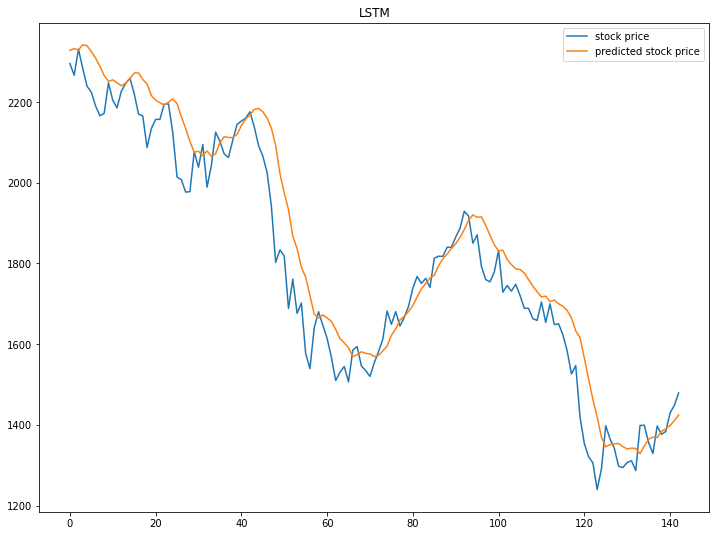

# RMSE  65.89757667256707
kospi 시가 : [2209.00096428]


In [ ]:
X_test, y_test = make_sample(test_data, 7)
pred = model2.predict(X_test)

import tensorflow.python.keras.losses as losses
plt.figure(figsize=(12, 9))
plt.title('LSTM')
plt.plot(y_test*scaler.data_max_, label='stock price')
plt.plot(pred*scaler.data_max_, label='predicted stock price')
pred_n=pred*scaler.data_max_
y_test_n=y_test*scaler.data_max_
plt.legend()
plt.show()
print('# RMSE ',np.mean(losses.mean_squared_error(pred_n,y_test_n)**0.5))
print("kospi 시가 :", df.Open[-1] * pred[-1] / scaled[-1])


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# 데이터 로드
df = fdr.DataReader('KS11','2019-11-1','2022-10-31')

open = df[['Open']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(open)

TEST_SIZE = 150
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data)-window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 7)
nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.5 µs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


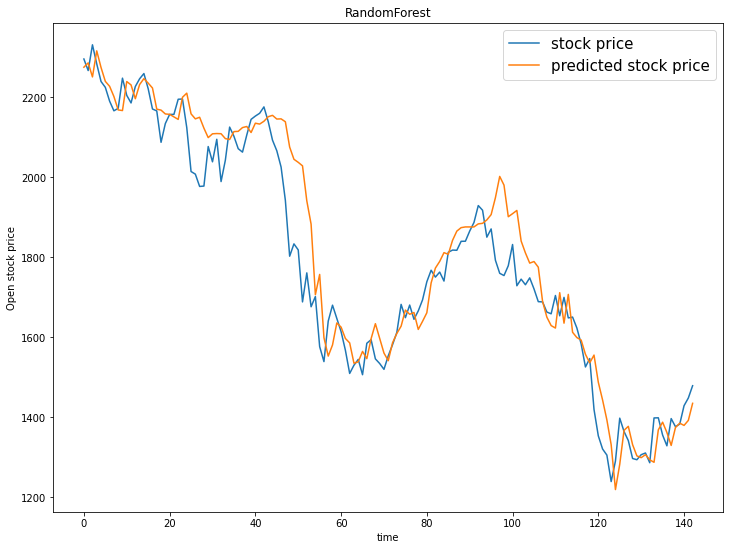

# RMSE  415.3174136994672
내일 kospi 시가 : [2225.51739808]


In [ ]:
%time
X_test, y_test = make_sample(test_data, 7)
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(max_depth = 20, max_features = 5, 
                               min_samples_leaf = 5, n_estimators = 200)
# 모델 학습
model1.fit(X_train, y_train)
# 예측값 생성
pred1 = model1.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.title('RandomForest')
plt.plot(y_test*scaler.data_max_, label='stock price')
plt.plot(pred1*scaler.data_max_, label='predicted stock price')
pred_n=pred1*scaler.data_max_
y_test_n=y_test*scaler.data_max_
plt.xlabel('time')
plt.ylabel('Open stock price')
plt.legend(prop={'size': 15})
plt.show()

print('# RMSE ',np.mean(losses.mean_squared_error(pred_n,y_test_n)**0.5))
print("내일 kospi 시가 :", df.Open[-1] * pred1[-1] / scaled[-1])

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.1 µs


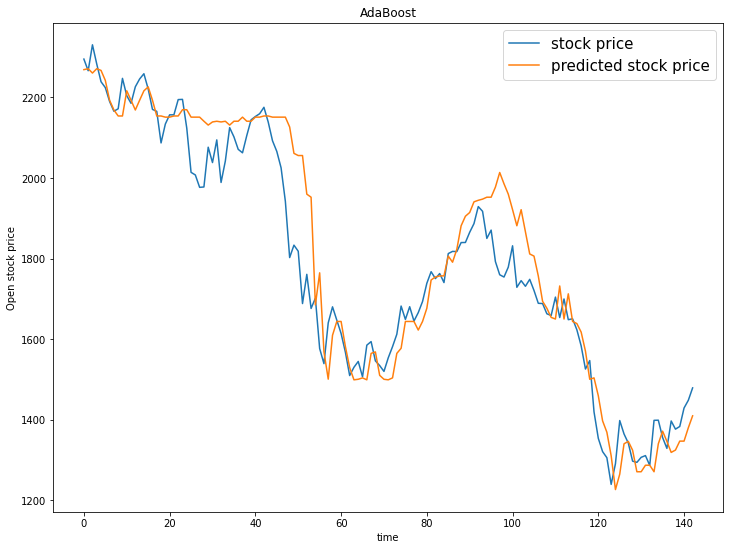

# RMSE  423.58364464848205
내일 kospi 시가 : [2186.24628045]


In [ ]:
%time
X_test, y_test = make_sample(test_data, 7)
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
from sklearn.ensemble import AdaBoostRegressor

model2 = AdaBoostRegressor(learning_rate = 1, loss = 'linear', n_estimators = 100)
# 모델 학습
model2.fit(X_train, y_train.ravel())
# 예측값 생성
pred2 = model2.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.title('AdaBoost')
plt.plot(y_test*scaler.data_max_, label='stock price')
plt.plot(pred2*scaler.data_max_, label='predicted stock price')
pred_n=pred2*scaler.data_max_
y_test_n=y_test*scaler.data_max_
plt.xlabel('time')
plt.ylabel('Open stock price')
plt.legend(prop={'size': 15})
plt.show()
print('# RMSE ',np.mean(losses.mean_squared_error(pred_n,y_test_n)**0.5))
print("내일 kospi 시가 :", df.Open[-1] * pred2[-1] / scaled[-1])

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.6 µs
[07:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


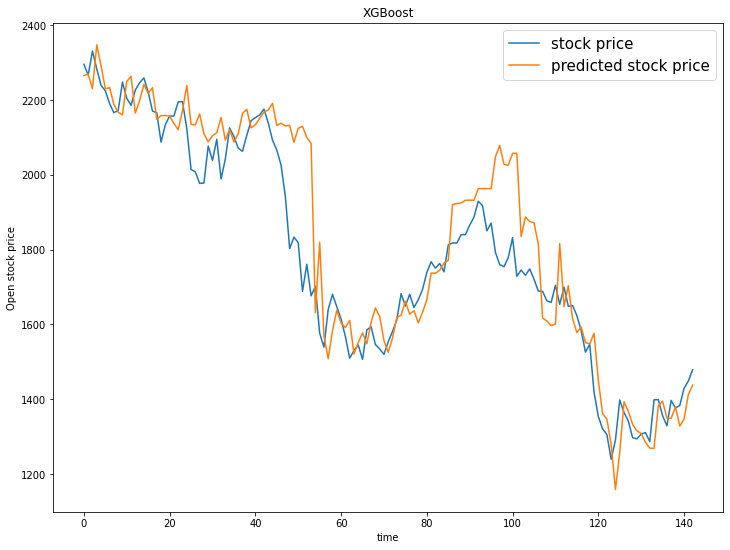

# RMSE  426.03997836474343
내일 kospi 시가 : [2229.77601042]


In [ ]:
%time
X_test, y_test = make_sample(test_data, 7)
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))
from xgboost import XGBRegressor

model3 = XGBRegressor(n_estimators = 100, colsample_bytree = 1, max_depth = 6,
                     reg_alpha = 0, reg_lambda = 0, subsample = 1)
# 모델 학습
model3.fit(X_train, y_train.ravel())
# 예측값 생성
pred3 = model3.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.title('XGBoost')
plt.plot(y_test*scaler.data_max_, label='stock price')
plt.plot(pred3*scaler.data_max_, label='predicted stock price')
pred_n=pred3*scaler.data_max_
y_test_n=y_test*scaler.data_max_
plt.xlabel('time')
plt.ylabel('Open stock price')
plt.legend(prop={'size': 15})
plt.show()
print('# RMSE ',np.mean(losses.mean_squared_error(pred_n,y_test_n)**0.5))
print("내일 kospi 시가 :", df.Open[-1] * pred3[-1] / scaled[-1])

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.4 µs


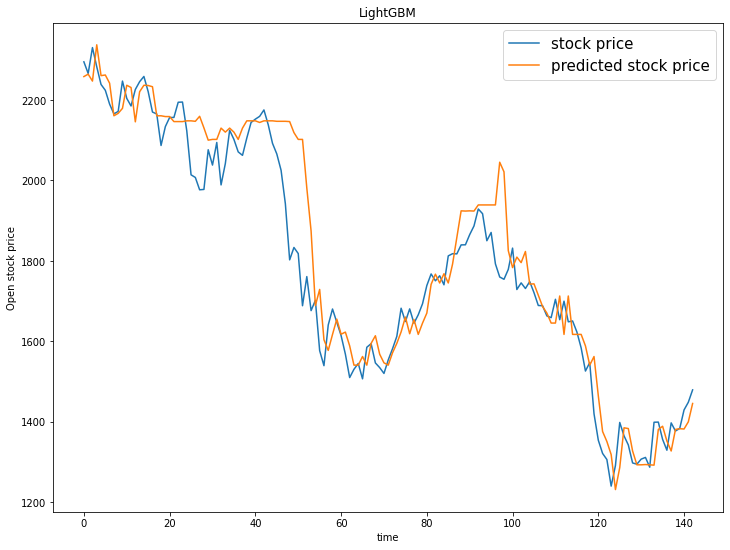

# RMSE  417.97491847170477
내일 kospi 시가 : [2229.77601042]


In [ ]:
%time
X_test, y_test = make_sample(test_data, 7)
nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

import lightgbm as lgb

model4 = lgb.LGBMRegressor(learning_rate=0.03, max_depth=3, n_estimators=900, num_leaves=7)

# 모델 학습
model4.fit(X_train, y_train.ravel())
# 예측값 생성
pred4 = model4.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.title('LightGBM')
plt.plot(y_test*scaler.data_max_, label='stock price')
plt.plot(pred4*scaler.data_max_, label='predicted stock price')
pred_n=pred4*scaler.data_max_
y_test_n=y_test*scaler.data_max_
plt.xlabel('time')
plt.ylabel('Open stock price')
plt.legend(prop={'size': 15})
plt.show()
print('# RMSE ',np.mean(losses.mean_squared_error(pred_n,y_test_n)**0.5))
print("내일 kospi 시가 :", df.Open[-1] * pred3[-1] / scaled[-1])
